# Assignment 3

## Question 1
In the resources folder you will find a file called velocities.txt, which
contains two columns of numbers, the first representing time $t$ in seconds and the second the $x$-velocity in meters per second of a particle, measured once every second from time $t = 0$ to $t = 100$.

1) Read the data and, using the trapezoidal rule, calculate from them the approximate distance traveled by the particle in the x direction as a function of time.

2) Extend your program to make a graph that shows, on the same plot, both the original velocity curve and the distance traveled as a function of time.

You can use np.loadtxt() function to read data from txt file.
https://www.geeksforgeeks.org/how-to-read-a-numerical-data-or-file-in-python-with-numpy/

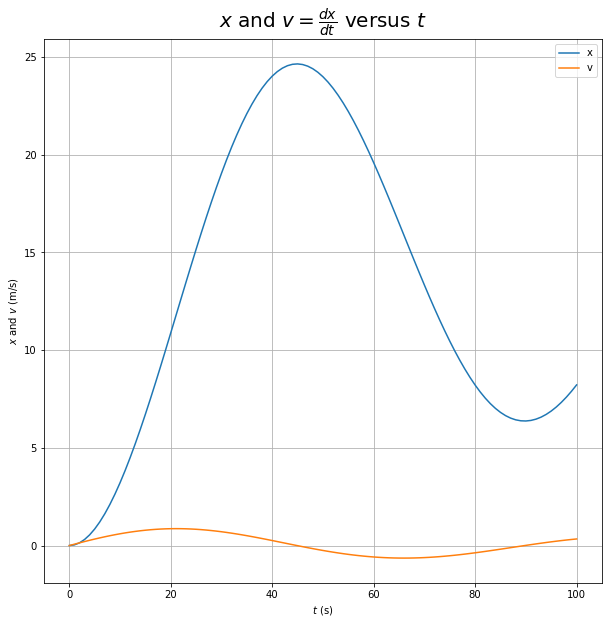

In [24]:
import numpy as np
import matplotlib.pyplot as plt
#Reading
filename = 'velocities.txt'
velocity = np.loadtxt(filename)

#print(data_collected)
#print(velocity.shape)

#Getting the x-displacement using trapezoidal rule
x=np.linspace(0,1,len(velocity))
for n in range(len(velocity)):
    
    I=0
    for j in range(n):
        I = I + (velocity[j][1]+velocity[j+1][1])/2
    
    x[n] = I

#Plotting
t = velocity[:,0]
v = velocity[:,1]
plt.figure(figsize=(10,10))
plt.plot(t,x,label='x')
plt.plot(t,v,label='v')
plt.legend()
plt.xlabel(r'$t$ (s)',size=10)
plt.ylabel(r'$x$ and $v$ (m/s)',size=10)
plt.title(r'$x$ and $v=\frac{dx}{dt}$ versus $t$',size=20)

plt.grid()
plt.show()


## Question 2
A standard problem in elementary quantum mechanics is to find the energies of
the bound states within a square well potential. The energies $E = −E_B < 0$ of
the bound states are solutions of the transcendental equations


$\sqrt{V_0-E_b}\tan({\sqrt{V_0-E_b}}) = \sqrt{E_B}$ (even)


$\sqrt{V_0-E_b}\cot({\sqrt{V_0-E_b}}) = \sqrt{E_B}$ (odd)

where even and odd refer to the symmetry of the wave function.


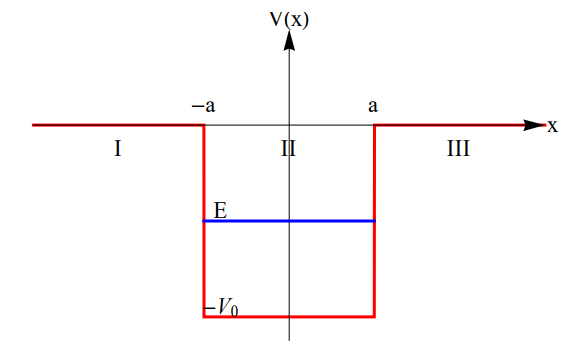

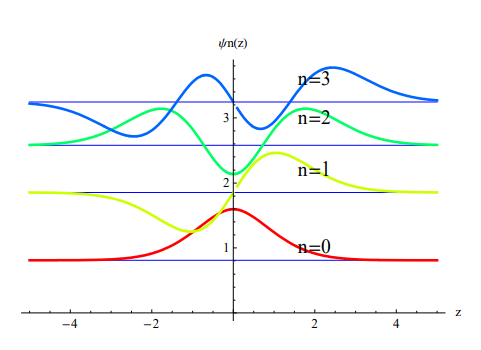

(reference:https://bingweb.binghamton.edu/~suzuki/QM_Graduate/1D_Bound_state.pdf)


1) A good first step in a search is to get some idea of what your function looks
like. For this purpose plot the LHS-RHS of above equations versus $E_B$.

2) Use the bisection algorithm to find several solutions of above equations.

3) Use the Newton-Raphson algorithm to find some solutions to the same level of precision as demanded of the bisection algorithm, and compare the speed of the two methods.

Take $V_0=80$ (in arbitrary units)

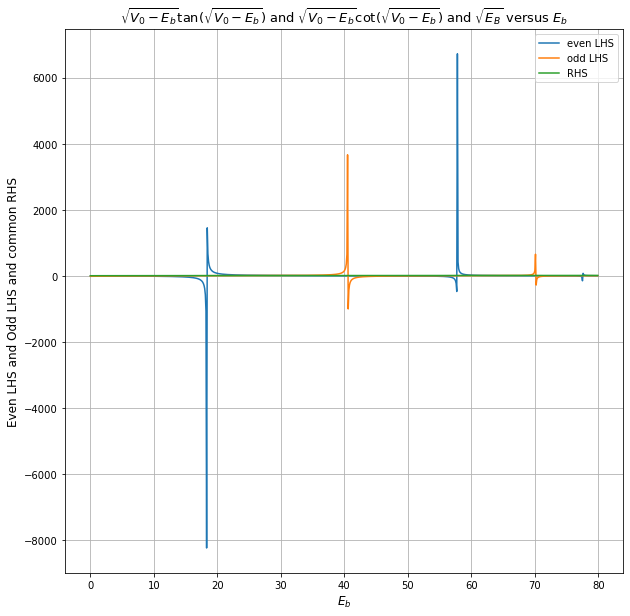

Energy values using Bisection Method
x= 31.53076171875 , even(x)= 0.0008575238878076874 , iterations= 10
x= 62.183837890625 , even(x)= -0.00018752981466363394 , iterations= 11
x= 78.00556030273437 , even(x)= 0.0004235652112978272 , iterations= 13
x= 27.82470703125 , odd(x)= -0.00020241236088924808 , iterations= 10
x= 67.399755859375 , odd(x)= 0.0002456008790598929 , iterations= 10

Energy values using Newton Raphson Method
x= 31.531643079414202 , even(x)= 5.796201421048863e-07 , iterations= 1
x= 62.18376348968094 , even(x)= 6.908941259098356e-07 , iterations= 1
x= 78.00557922012517 , even(x)= 1.184444112567462e-06 , iterations= 1
x= 27.825033076162363 , odd(x)= 1.597658529917112e-07 , iterations= 1
x= 67.39966989514589 , odd(x)= 5.9387252093756615e-06 , iterations= 1
The amount of iterations required for Newton-Raphson is incredibly less than Bisection


In [32]:
#STEP 1
def evenLHS(x):
    return np.sqrt(80-x)*np.tan(np.sqrt(80-x))
def oddLHS(x):
    return np.sqrt(80-x)/np.tan(np.sqrt(80-x))
def RHS(x):
    return np.sqrt(x)

Eb = np.linspace(0,79.9,800)

plt.figure(figsize=(10,10))
plt.plot(Eb,evenLHS(Eb),label='even LHS')
plt.plot(Eb,oddLHS(Eb),label='odd LHS')
plt.plot(Eb,RHS(Eb),label='RHS')
plt.legend()
plt.xlabel(r'$E_b$',size=12)
plt.ylabel(r'Even LHS and Odd LHS and common RHS',size=12)
plt.title(r'$\sqrt{V_0-E_b}\tan({\sqrt{V_0-E_b}})$ and $\sqrt{V_0-E_b}\cot({\sqrt{V_0-E_b}})$ and $\sqrt{E_B}$ versus $E_b$',size=13)

plt.grid()
plt.show()

#E1 = np.linspace(42,69.9,100)
#plt.figure(figsize=(7,10))
#plt.plot(E1,evenLHS(E1),label='even LHS')
#plt.plot(E1,oddLHS(E1),label='odd LHS')
#plt.plot(E1,RHS(E1),label='RHS')
#plt.legend()

#plt.grid()
#plt.show()

#STEP 2
print("Energy values using Bisection Method")
def even(x):
    return evenLHS(x)-RHS(x)
def odd(x):
    return oddLHS(x)-RHS(x)
EvenGuessIntervals = np.array([[30,35],[60,65],[77.6,79.9]])
OddGuessIntervals = np.array([[25,30],[65,69.9]])
error = 0.001
#Even function solutions
for i in range(3):
    n=0
    x = (EvenGuessIntervals[i][0]+EvenGuessIntervals[i][1])/2
    while(abs(even(x))>error):
        if(even(x)*even(EvenGuessIntervals[i][0])<0):
            EvenGuessIntervals[i][1] = x
        else:
            EvenGuessIntervals[i][0] = x
        x = (EvenGuessIntervals[i][0]+EvenGuessIntervals[i][1])/2
        n = n+1
    print("x=",x,", even(x)=",even(x),", iterations=",n)
#Odd function solutions
for i in range(2):
    n=0
    x = (OddGuessIntervals[i][0]+OddGuessIntervals[i][1])/2
    while(abs(odd(x))>error):
        if(odd(x)*odd(OddGuessIntervals[i][0])<0):
            OddGuessIntervals[i][1] = x
        else:
            OddGuessIntervals[i][0] = x
        x = (OddGuessIntervals[i][0]+OddGuessIntervals[i][1])/2
        n = n+1
    print("x=",x,", odd(x)=",odd(x),", iterations=",n)

#STEP 3
print("\nEnergy values using Newton Raphson Method")
def evenPrime(x):
    return -(1/(2*np.sqrt(x))) - (np.tan(np.sqrt(80-x))/(2*np.sqrt(80-x))) - (1/(2*((np.cos(np.sqrt(80-x)))**2)))

def oddPrime(x):
    return -(1/(2*np.sqrt(x))) - (1/(2*np.sqrt(80-x)*np.tan(np.sqrt(80-x)))) + (1/(2*((np.sin(np.sqrt(80-x)))**2)))
#Even function solutions
for i in range(3):
    n = 0
    x = EvenGuessIntervals[i][0]
    while(abs(even(x))>error and (n<100)):
        x1 = x - even(x)/evenPrime(x)
        x = x1
        n = n+1
    print("x=",x,", even(x)=",even(x),", iterations=",n)
#Odd function solutions
for i in range(2):
    n = 0
    x = OddGuessIntervals[i][1]
    while(abs(odd(x))>error and (n<100)):
        x1 = x - odd(x)/oddPrime(x)
        x = x1
        n = n+1
    print("x=",x,", odd(x)=",odd(x),", iterations=",n)

print("The amount of iterations required for Newton-Raphson is incredibly less than Bisection")

## Question 3
In the resources folder you will find a file called stm.txt, which contains a grid of values from scanning tunneling microscope measurements of the surface of silicon. A scanning tunneling microscope (STM) is a device that measures the shape of surfaces at the atomic level by tracking a sharp tip over the surface and measuring quantum tunneling current as a function of position. The probability of quantum tunneling between any two points is related to the distance between the points. Therefore, the regions on surface which are protruding out have higher probability of quantum tunneling and vice versa. This measurement of tunneling helps us to relate the distance between the tip and the surface at various points, using which we can generate the shape, at atomic scales, of surface of the material. 
<img src="https://th.bing.com/th/id/R.751c76121e5c400761c1e929edc03f79?rik=971J8JhWDKAOQw&riu=http%3a%2f%2fchem.libretexts.org%2f%40api%2fdeki%2ffiles%2f69957%2fScanningTunnelingMicroscope_schematic.png%3frevision%3d1&ehk=%2b3RqS1y9PGmRwqZbGXR0QAFVrWgnA6rLxPCWxDtkbdc%3d&risl=&pid=ImgRaw&r=0" width="500" height="500">
(Image reference:https://th.bing.com/th/id/R.751c76121e5c400761c1e929edc03f79?rik=971J8JhWDKAOQw&riu=http%3a%2f%2fchem.libretexts.org%2f%40api%2fdeki%2ffiles%2f69957%2fScanningTunnelingMicroscope_schematic.png%3frevision%3d1&ehk=%2b3RqS1y9PGmRwqZbGXR0QAFVrWgnA6rLxPCWxDtkbdc%3d&risl=&pid=ImgRaw&r=0)

The end result is a grid of values that represent the height of the surface as a function of position and the data in the file stm.txt contain just such a grid of values. Write a program to visualize the STM data and hence create a 2D colormap as well as a 3D picture of what the silicon surface looks like. 

(663, 676)
[[24.28 26.41 28.71 ... 25.88 26.06 25.88]
 [23.93 26.06 28.36 ... 25.7  25.7  25.52]
 [23.22 25.52 27.83 ... 25.35 25.52 25.17]
 ...
 [13.12 13.65 14.18 ... 16.31 16.31 16.31]
 [13.12 13.65 14.18 ... 16.84 17.02 16.84]
 [13.12 13.65 14.   ... 17.37 17.55 17.37]]


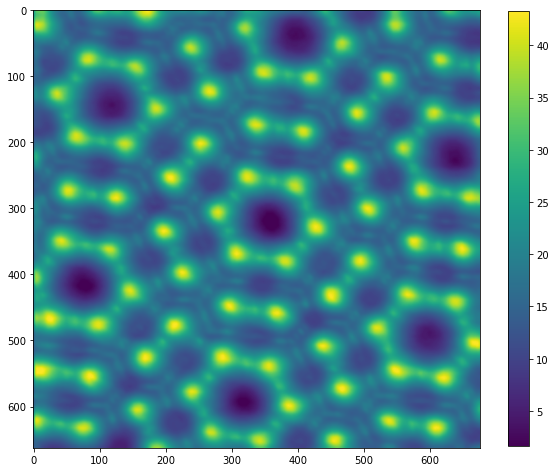

In [29]:
imgname = 'stm.txt'
img = np.loadtxt(imgname)
print(img.shape)
print(img)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.colorbar(shrink=0.8)

(663, 676)
(663, 676)


<Figure size 432x288 with 0 Axes>

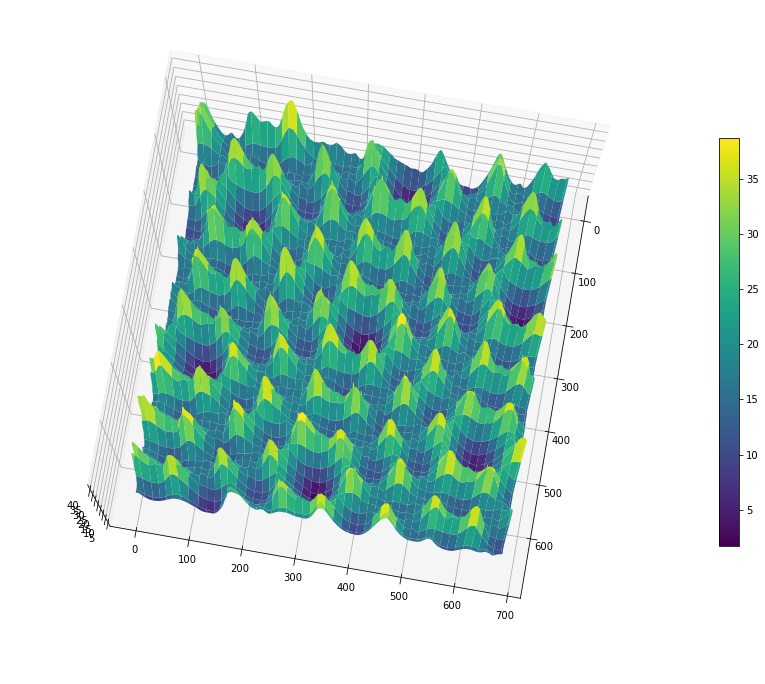

In [31]:
xx, yy = np.mgrid[0:img.shape[0], 0:img.shape[1]]
print(xx.shape)
print(yy.shape)
fig = plt.figure()

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')

#drawing surface plot
surface_plot= ax.plot_surface(xx, yy, img,cmap='viridis')
fig.colorbar(surface_plot,shrink = 0.5)
ax.view_init(80, 10)
plt.show()